NAME: HITARTH BHATT   SAP-ID: 60009220209   BATCH: D1-2

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
start_date = '2020-01-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')
data = yf.download(tickers, start=start_date, end=end_date)
closing_prices = data['Close'].dropna()

print("--- Closing Prices Data (Last 5 Days) ---")
print(closing_prices.tail())

/tmp/ipython-input-1451540470.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed

--- Closing Prices Data (Last 5 Days) ---
Ticker      HDFCBANK.NS  RELIANCE.NS       TCS.NS
Date                                             
2025-08-04  1992.000000  1411.500000  3074.399902
2025-08-05  1977.599976  1391.699951  3063.899902
2025-08-06  1985.300049  1392.800049  3032.300049
2025-08-07  1995.400024  1389.400024  3047.000000
2025-08-08  1973.900024  1367.800049  3036.399902


Normalized Price Performance

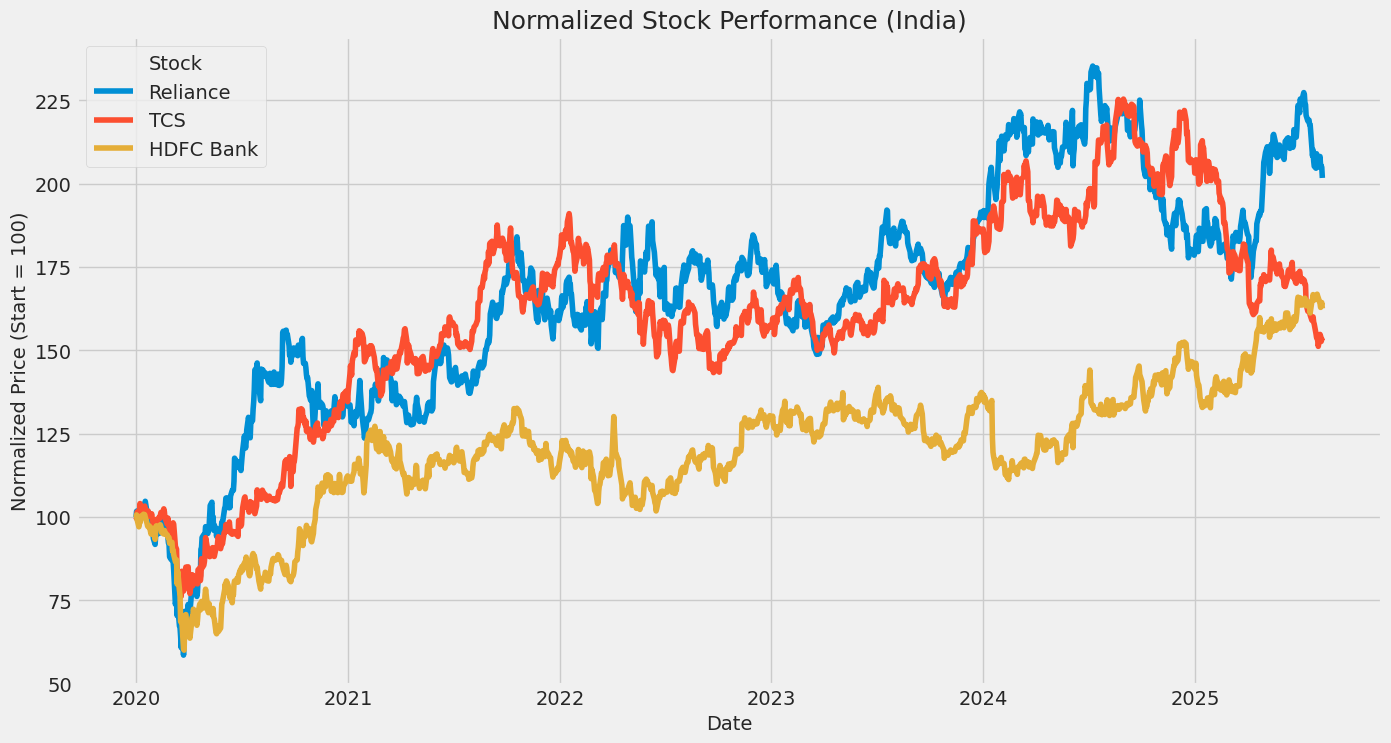

In [ ]:
normalized_prices = (closing_prices / closing_prices.iloc[0] * 100)
plt.figure(figsize=(15, 8))
plt.plot(normalized_prices['RELIANCE.NS'], label='Reliance')
plt.plot(normalized_prices['TCS.NS'], label='TCS')
plt.plot(normalized_prices['HDFCBANK.NS'], label='HDFC Bank')

plt.title('Normalized Stock Performance (India)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Price (Start = 100)', fontsize=14)
plt.legend(title='Stock')
plt.grid(True)
plt.show()

Risk-Adjusted Return Metrics

In [ ]:
def calculate_risk_metrics(returns, risk_free_rate=0.0):
    """Calculates key risk-adjusted return metrics."""
    trading_days = 252
    mean_return_annual = returns.mean() * trading_days
    std_dev_annual = returns.std() * np.sqrt(trading_days)
    sharpe_ratio = (mean_return_annual - risk_free_rate) / std_dev_annual

    downside_returns = returns[returns < 0]
    downside_std_dev_annual = downside_returns.std() * np.sqrt(trading_days)
    sortino_ratio = (mean_return_annual - risk_free_rate) / downside_std_dev_annual

    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns / peak) - 1
    max_drawdown = drawdown.min()
    calmar_ratio = mean_return_annual / abs(max_drawdown)

    return pd.Series({
        'Annualized Return': mean_return_annual,
        'Max Drawdown': max_drawdown,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio,
        'Calmar Ratio': calmar_ratio
    })

In [ ]:
daily_returns = closing_prices.pct_change().dropna()

results = daily_returns.apply(calculate_risk_metrics)
print("--- Risk-Adjusted Metrics Summary ---")
print(results.T)

--- Risk-Adjusted Metrics Summary ---
             Annualized Return  Max Drawdown  Sharpe Ratio  Sortino Ratio  \
Ticker                                                                      
HDFCBANK.NS           0.123132     -0.404653      0.466443       0.617702   
RELIANCE.NS           0.169191     -0.440829      0.583860       0.833186   
TCS.NS                0.106099     -0.329201      0.439710       0.627473   

             Calmar Ratio  
Ticker                     
HDFCBANK.NS      0.304291  
RELIANCE.NS      0.383803  
TCS.NS           0.322293  


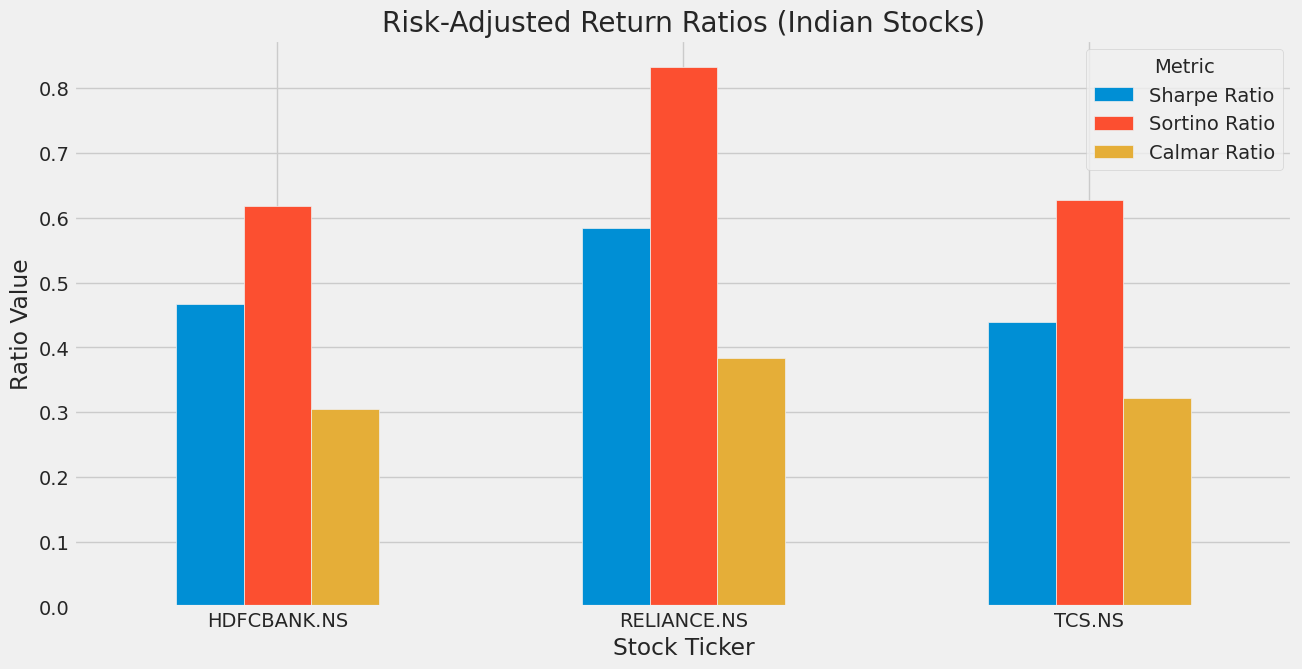

In [ ]:
ratios_to_plot = results.T[['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio']]
ax = ratios_to_plot.plot(
    kind='bar',
    figsize=(14, 7),
    rot=0,
    title='Risk-Adjusted Return Ratios (Indian Stocks)'
)
ax.set_xlabel("Stock Ticker")
ax.set_ylabel("Ratio Value")
ax.legend(title='Metric')
ax.axhline(0, color='grey', linewidth=0.8)
plt.show()

Historical Drawdown Comparison

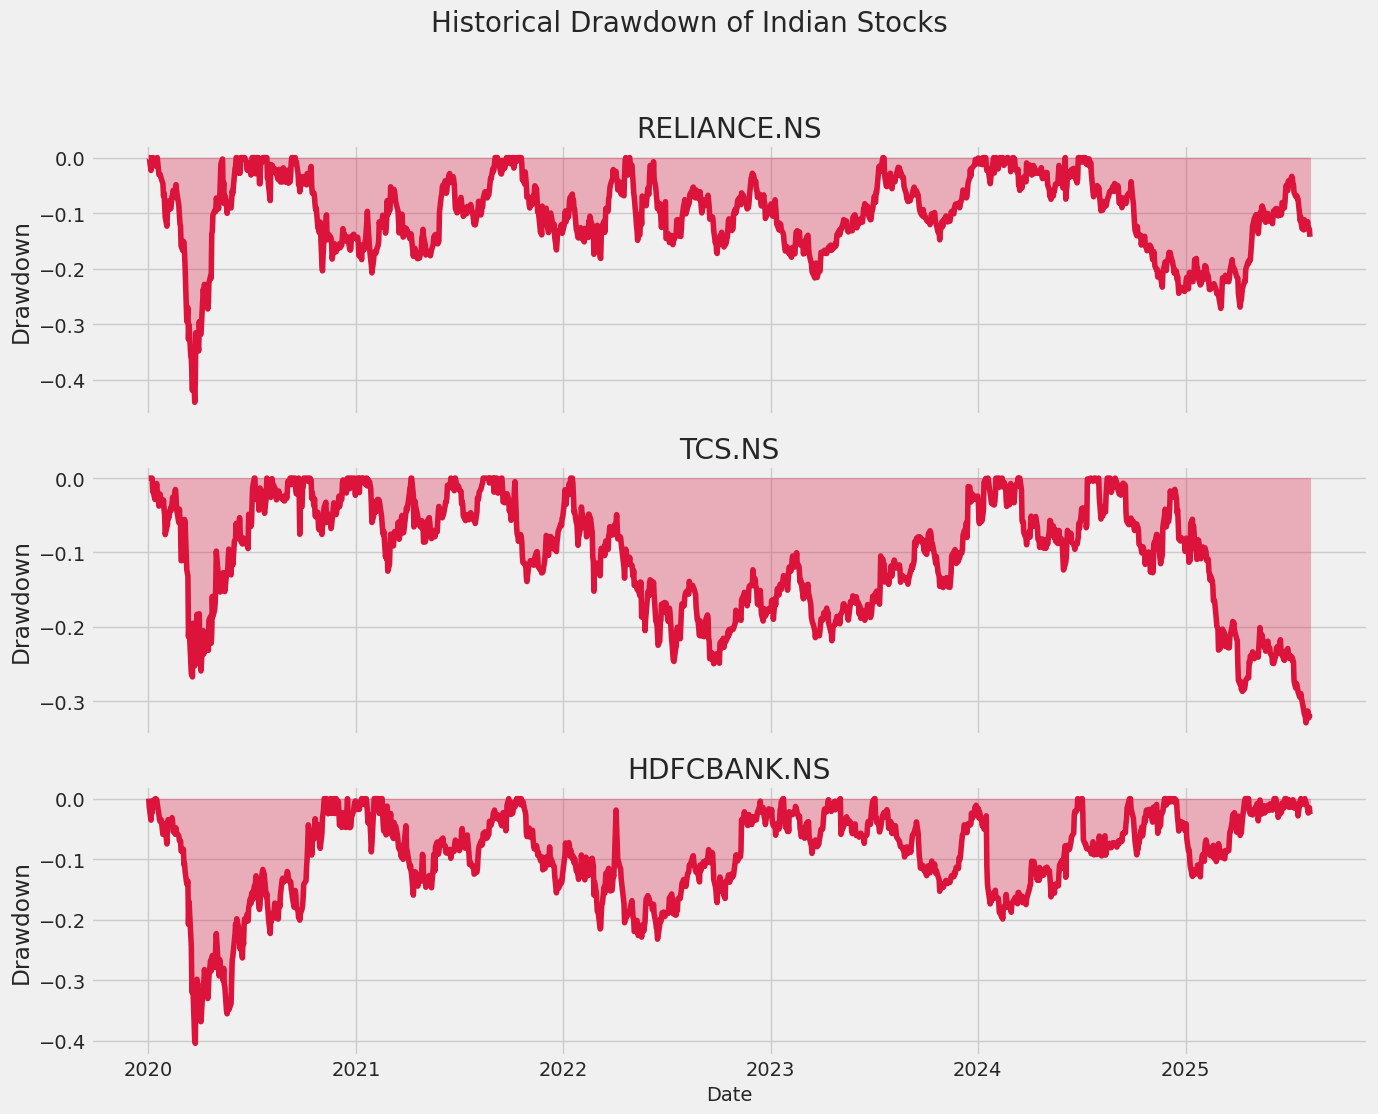

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12), sharex=True)
fig.suptitle('Historical Drawdown of Indian Stocks', fontsize=20, y=0.93)

for i, stock in enumerate(tickers):
    cumulative_return = (1 + daily_returns[stock]).cumprod()
    running_peak = cumulative_return.expanding().max()
    drawdown = (cumulative_return - running_peak) / running_peak

    axes[i].plot(drawdown, color='crimson')
    axes[i].fill_between(drawdown.index, drawdown, 0, color='crimson', alpha=0.3)
    axes[i].set_title(stock)
    axes[i].set_ylabel('Drawdown')
    axes[i].grid(True)

plt.xlabel('Date', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

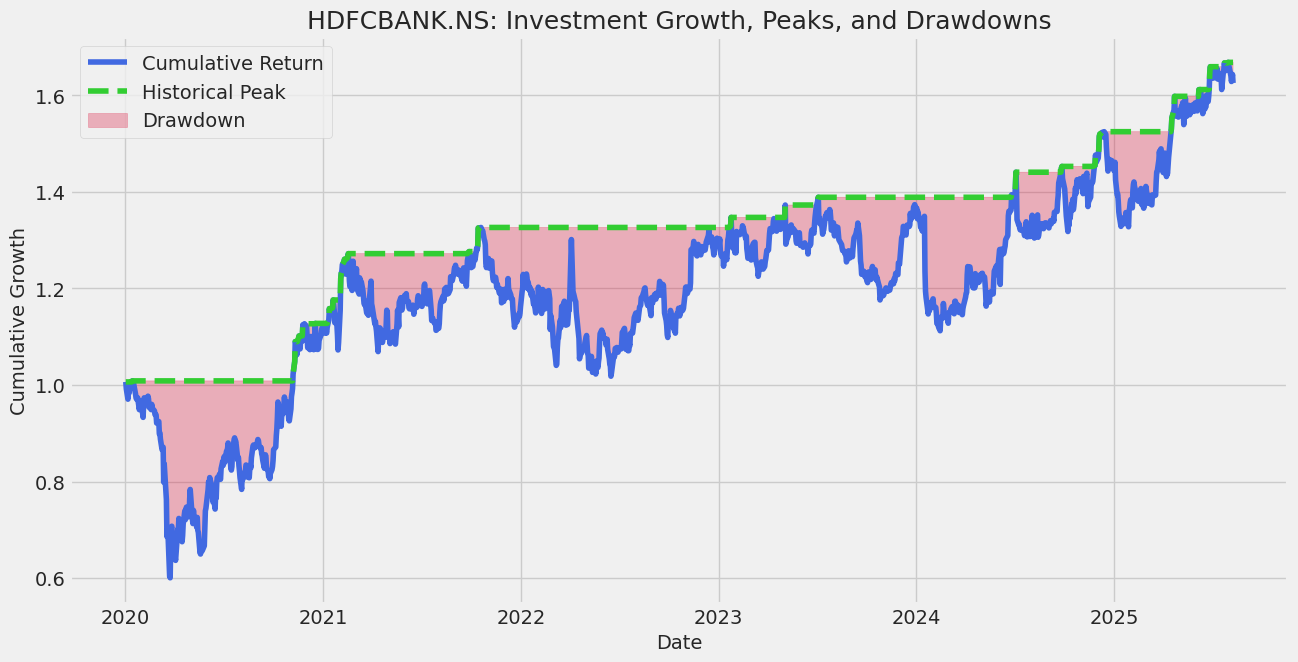

In [ ]:
hdfc_returns = closing_prices['HDFCBANK.NS'].pct_change().dropna()
hdfc_cumulative_return = (1 + hdfc_returns).cumprod()

hdfc_running_peak = hdfc_cumulative_return.expanding().max()

plt.figure(figsize=(14, 7))
plt.plot(hdfc_cumulative_return, label='Cumulative Return', color='royalblue')
plt.plot(hdfc_running_peak, label='Historical Peak', color='limegreen', linestyle='--')

plt.fill_between(
    hdfc_cumulative_return.index,
    hdfc_cumulative_return,
    hdfc_running_peak,
    where=(hdfc_cumulative_return < hdfc_running_peak),
    color='crimson',
    alpha=0.3,
    label='Drawdown'
)

plt.title('HDFCBANK.NS: Investment Growth, Peaks, and Drawdowns', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Growth', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

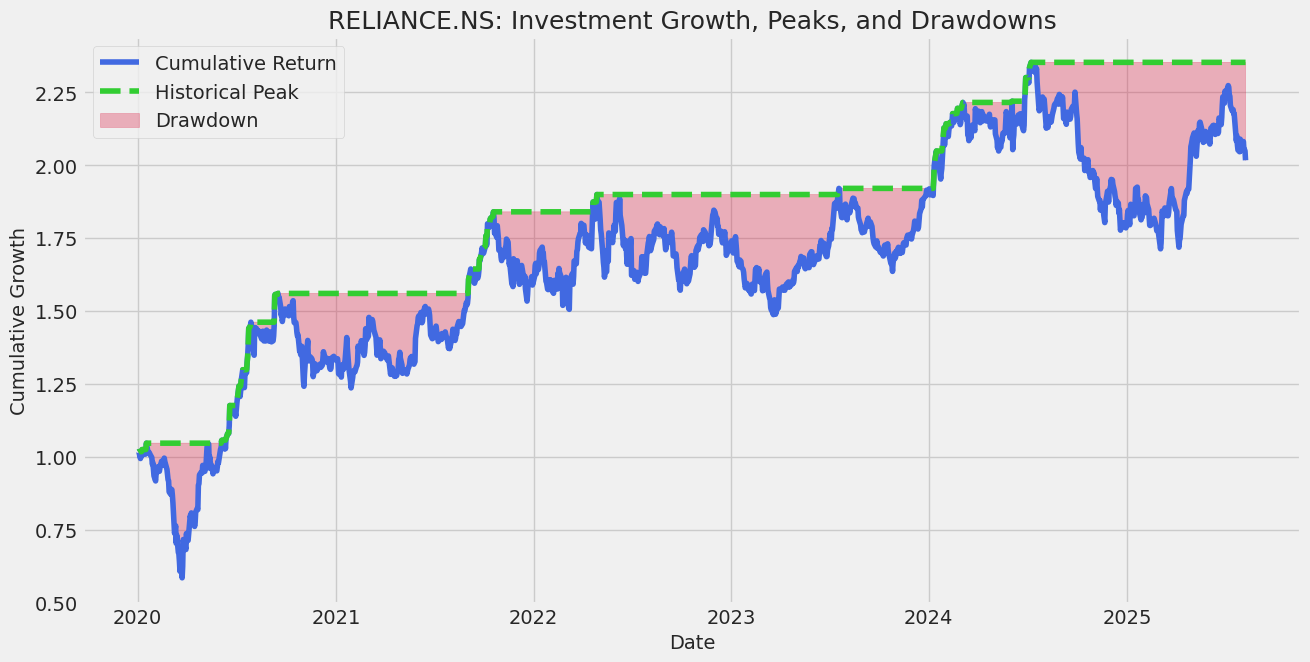

In [ ]:
reliance_returns = closing_prices['RELIANCE.NS'].pct_change().dropna()
reliance_cumulative_return = (1 + reliance_returns).cumprod()

reliance_running_peak = reliance_cumulative_return.expanding().max()

plt.figure(figsize=(14, 7))
plt.plot(reliance_cumulative_return, label='Cumulative Return', color='royalblue')
plt.plot(reliance_running_peak, label='Historical Peak', color='limegreen', linestyle='--')

plt.fill_between(
    reliance_cumulative_return.index,
    reliance_cumulative_return,
    reliance_running_peak,
    where=(reliance_cumulative_return < reliance_running_peak),
    color='crimson',
    alpha=0.3,
    label='Drawdown'
)

plt.title('RELIANCE.NS: Investment Growth, Peaks, and Drawdowns', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Growth', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

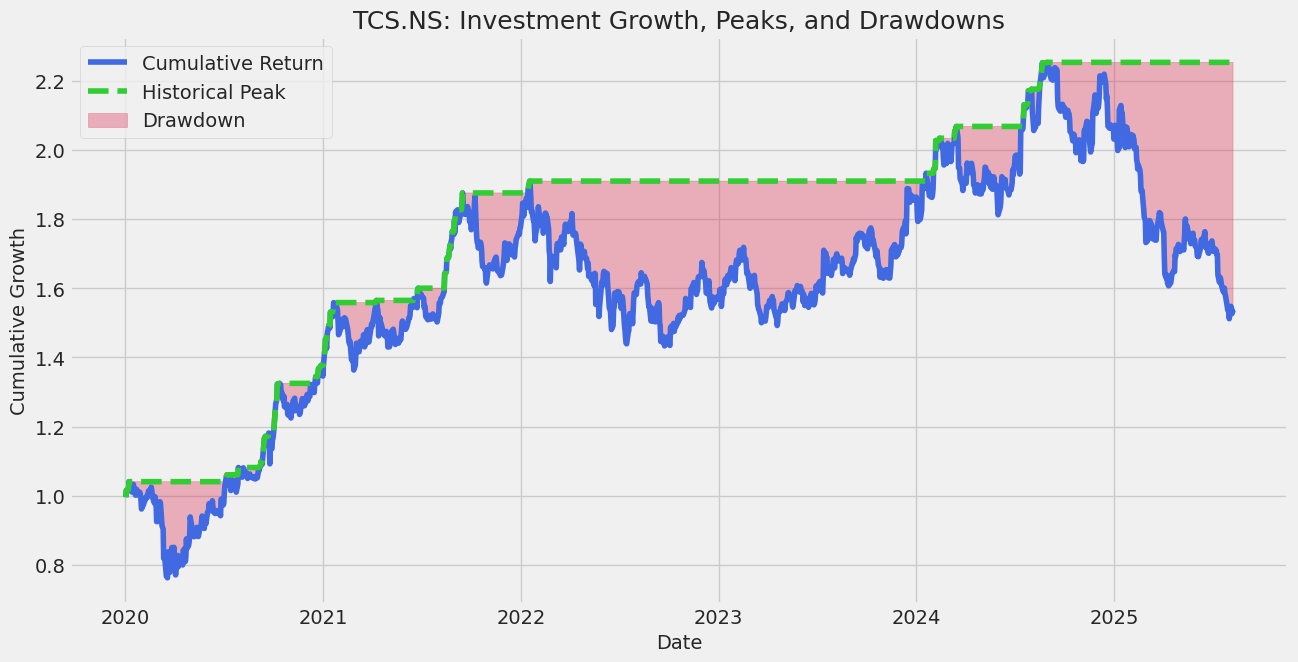

In [ ]:
tcs_returns = closing_prices['TCS.NS'].pct_change().dropna()
tcs_cumulative_return = (1 + tcs_returns).cumprod()

tcs_running_peak = tcs_cumulative_return.expanding().max()

plt.figure(figsize=(14, 7))
plt.plot(tcs_cumulative_return, label='Cumulative Return', color='royalblue')
plt.plot(tcs_running_peak, label='Historical Peak', color='limegreen', linestyle='--')

plt.fill_between(
    tcs_cumulative_return.index,
    tcs_cumulative_return,
    tcs_running_peak,
    where=(tcs_cumulative_return < tcs_running_peak),
    color='crimson',
    alpha=0.3,
    label='Drawdown'
)

plt.title('TCS.NS: Investment Growth, Peaks, and Drawdowns', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Growth', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#Analysis

#HDFC Bank (HDFCBANK.NS)

An analysis of HDFC Bank's performance reveals a challenging period characterized by modest returns and significant risk. The stock yielded an Annualized Return of 12.31%, a moderate gain that is put into perspective by its risk profile. The Max Drawdown was a substantial -40.47%, as visualized in its historical drawdown chart, indicating that investors faced a considerable loss of capital from its peak. This high level of risk was not adequately compensated, as shown by its low risk-adjusted ratios. The Sharpe Ratio (0.47) and Calmar Ratio (0.30) are both low, signifying that the return per unit of total risk and drawdown risk was poor. While the Sortino Ratio (0.62) is slightly better, it still suggests an inefficient performance even when only considering downside volatility. Overall, HDFC Bank presented an unattractive risk-reward trade-off during this period.

#Reliance Industries (RELIANCE.NS)

Reliance Industries demonstrated the strongest performance among the three stocks, delivering a superior blend of return and risk management. It achieved the highest Annualized Return at 16.92%. While it did experience a significant Max Drawdown of -44.08%, its ability to generate higher returns resulted in the best risk-adjusted metrics of the group. As seen in the bar chart, Reliance leads with the highest Sharpe Ratio (0.58), Sortino Ratio (0.83), and Calmar Ratio (0.38). This indicates that, despite its volatility, it provided the most effective compensation for all forms of risk measured. The high Sortino Ratio is particularly notable, suggesting strong performance relative to its downside risk. In conclusion, Reliance proved to be the most efficient and robust investment choice of the trio.

#Tata Consultancy Services (TCS.NS)

TCS exhibited a profile of stability and capital preservation, making it the most conservative investment of the group. It generated the lowest Annualized Return at 10.61%, but this was coupled with the smallest Max Drawdown of -32.92%, as illustrated in its drawdown chart. This highlights its defensive nature and lower volatility compared to its peers. The risk-adjusted ratios reflect this balanced profile; while its Sharpe Ratio (0.44) and Calmar Ratio (0.32) are not the highest, they are respectable given the lower return. The Sortino Ratio (0.63) is competitive, indicating it managed downside risk effectively. For an investor prioritizing risk mitigation and steady, albeit slower, growth, TCS represented a prudent and resilient choice during this period.

Sharpe Ratio (Return vs. Total Risk): This ratio tells us which stock gave the most return for the total risk (volatility) taken. AAPL has the highest Sharpe Ratio, confirming that its superior returns were not just due to excessive risk-taking.

Sortino Ratio (Return vs. Downside Risk): This ratio is similar to Sharpe but only penalizes for "bad" volatility (negative returns). Here again, AAPL leads, reinforcing that it performed well even when only considering downside risk. The fact that the Sortino Ratios are higher than the Sharpe Ratios for all stocks suggests that their volatility was not skewed heavily to the downside.

Calmar Ratio (Return vs. Drawdown Risk): This ratio assesses return relative to the worst-case loss (Max Drawdown). AAPL's high Calmar Ratio shows its strong ability to generate returns while avoiding catastrophic drops. Even though AAWW had high returns, its large drawdown resulted in a lower Calmar Ratio compared to AAPL.

#Conclusion

An analysis of the three securities—A, AAWW, and ZYXI—reveals distinct and highly divergent risk-reward profiles, leading to clear investment suitability conclusions.

The performances of Stock A and Stock AAWW place them in a similar category of inefficient, high-risk assets. Both delivered modest annualized returns (12.4% and 11.4%, respectively) that were entirely overshadowed by severe maximum drawdowns of -69.2% and -86.1%. Their consistently low Sharpe, Sortino, and Calmar ratios confirm that investors were poorly compensated for the extreme risk of capital loss they were forced to endure. Consequently, these stocks represent unattractive investment choices, as their risk profiles far outweighed their meager returns.

In stark contrast, Stock ZYXI represents a classic "boom-or-bust" speculative asset. It provided a phenomenal annualized return of 96.4%, but this came at the cost of a near-total drawdown of -98.5%. While its Calmar and Sortino ratios neared 1.0, indicating the high return almost justified the risk, the potential for a complete wipeout categorizes it as a speculative gamble rather than a stable investment.

Ultimately, none of these stocks would be suitable for a prudent, risk-averse portfolio. However, if a choice were required, ZYXI at least offered a reward commensurate with its extreme risk, whereas A and AAWW presented a much less favorable trade-off of high risk for low reward.